<a href="https://colab.research.google.com/github/LaurentTits/AI_execices/blob/main/D%C3%A9fisIA_NLP_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Préconfiguration du notebook
**/!\ Veillez à exécuter ces informations à chaque fois que vous démarrerez ce notebook**



## 0.1. Connexion à une machine
Tout d'abord, vérifiez que le notebook est connecté à une machine. Pour ce faire, regarder en haut à droite. Si vous ne voyez pas la RAM et l'espace disque, alors le notebook n'est pas connecté. Cliquez dès lors sur le bouton *Connecter*.

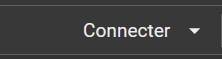

## 0.2. Connecter le notebook à un GPU
Ensuite, cliquez sur le bouton *Exécution*, *Modifier le type d'exécution* et choisissez *GPU*. Si demandé, acceptez de réexécuter l'environnement.

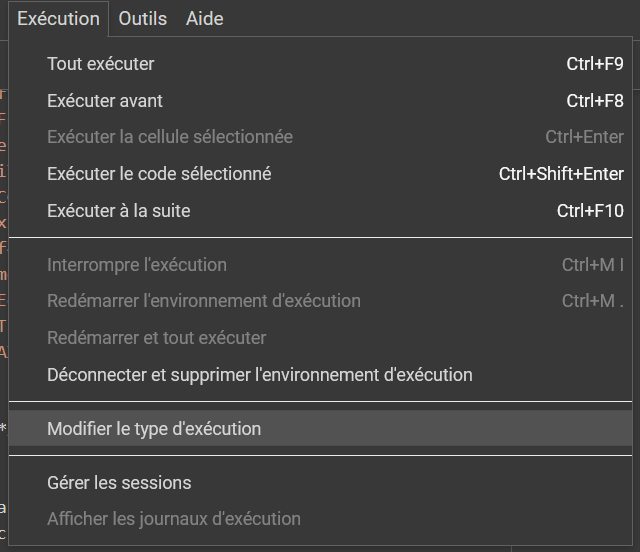

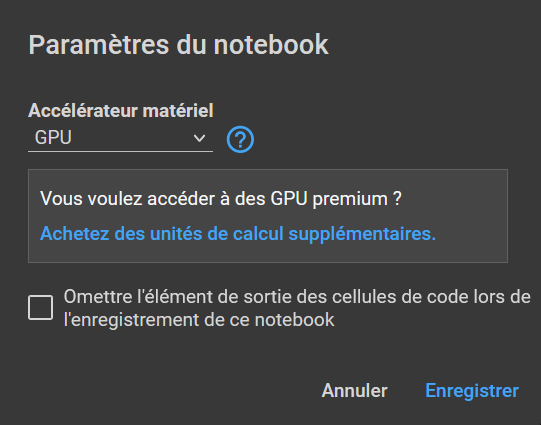

## 0.3. Connecter le notebook à Google Drive
Exécutez ensuite les deux prochains blocs pour connecter le notebook à votre Google Drive. N'oubliez pas de changer *MYPATH* par le chemin vers le dossier sur Google Drive où seront stockées les données nécessaires.

Si l'un des dossiers du chemin contient un espace, ajoutez le symbole \ devant chaque espace.
Par exemple, si vous souhaitez stocker les données dans le répertoire *Défis IA/NLP*, remplacez *MYPATH* par *Défis\ IA/NLP*.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/NLP

/content/drive/My Drive/NLP


## 0.4. Installation de librairies

In [3]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 17.0 MB/s 
     |████████████████████████████████| 7.6 MB 39.5 MB/s 
     |████████████████████████████████| 182 kB 70.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 13.7 MB/s 
     |████████████████████████████████| 212 kB 68.1 MB/s 
     |████████████████████████████████| 115 kB 69.1 MB/s 
     |████████████████████████████████| 127 kB 58.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## 0.5. Importation de librairies utiles

In [4]:
import os
import numpy as np
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=150, nanstr='nan', precision=3, suppress=False, threshold=1000, formatter=None)

# 1. Chargement des bases de données

## 1.1. Sklearn sur le jeu de données 20newsgroup

Commençons par importer le jeu de données 20newsgroup (https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). Ce jeu de données contient 18 000 news sur 20 thématiques différentes. Il est également divisé en deux sous-ensembles: le *training set*, pour entrainer un modèle, et le *test set* pour évaluer le modèle entrainé.

Dans le bloc de code suivant, nous importons le *training set* (subset='train'). Nous précisons également que les données de cet ensemble doivent être mélangées (shuffle=True). La variable *random_state* permet de fixer la *seed* des opérations aléatoires, ce qui garantit d'obtenir le même résultat à chaque exécution.

In [5]:
from sklearn.datasets import fetch_20newsgroups

news_ds_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

Dans le bloc de code suivant, plusieurs éléments sont affichés :
* La liste des topics abordés dans le jeu de données
* Le nombre de news 
* Le contenu de la 1ère news
* Le topic de la 1ère news

In [6]:
print("Liste des topics")
print(news_ds_train.target_names)
print("")
print("Nombre de news")
print(len(news_ds_train.data))
print("")
print("Affichage de la 1ère news")
print(news_ds_train.data[0])
print("")
print("Topic de la 1ère news")
print(news_ds_train.target_names[news_ds_train.target[0]])

Liste des topics
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Nombre de news
11314

Affichage de la 1ère news
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of produc

Si nous ne souhaitons pas travailler avec tous les topics, il est possible de déterminer dès le chargement du jeu de données les catégories que l'on souhaite utiliser.

In [7]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
news_ds_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(news_ds_train.target_names)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


*Exercice* - Dans le bloc de code suivant, chargez le *test set* de 20newsgroup. Les catégories à conserver sont : 
* rec.motorcycles
* rec.sport.baseball
* sci.crypt
* sci.electronics
* sci.med
* talk.politics.misc

Affichez ensuite: 
* la liste des topics utilisés
* le nombre de news
* le contenu de la 4ème news
* le topic de la 6ème news

In [14]:
categories = ['rec.motorcycles','rec.sport.baseball','sci.crypt','sci.electronics','sci.med','talk.politics.misc']
news_ds_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

print("Liste des topics")
print(news_ds_test.target_names)
print("")
print("Nombre de news")
print(len(news_ds_test.data))
print("")
print("Affichage de la 4ère news")
print(news_ds_test.data[3])
print("")
print("Topic de la 6ère news")
print(news_ds_test.target_names[news_ds_test.target[5]])

Liste des topics
['rec.motorcycles', 'rec.sport.baseball', 'sci.crypt', 'sci.electronics', 'sci.med', 'talk.politics.misc']

Nombre de news
2290

Affichage de la 4ère news
From: tgk@cs.toronto.edu (Todd Kelley)
Subject: Re: PC parallel I (!= I/O)
Organization: Department of Computer Science, University of Toronto
Lines: 36

erickson@azure.nmt.edu (Alan Erickson) writes:

> 	I'm trying to bring in 8+ bits to a PC, and would like
> 	to use interrupt-driven routines. Without buying an IO
> 	board or making a new port, _where_ can I bring in these
> 	bits? LPT seems to have only a few inputs, but I've heard
> 	rumours that some LPTs have bidirectional lines. Anybody
> 	know fer sure? If any bi-d LPTs, which boards have them
> 	(I'll be running a new 386DX-33)?

I know for sure that the Everex Magic I/O EV-170A can be jumpered
for a printer mode, or for a general purpose bidirectional I/O mode.

Also, I know for sure that the IBM Technical Reference says the following
about the Monochrome D

## 1.2. Huggingface sur le jeu de données 20newsgroup

Le chargement du jeu de données avec Huggingface est très similaire à celui de sklearn, à quelques détails près. Le bloc de code suivant vous montre comment procéder avec Huggingface pour obtenir les mêmes résultats qu'avec sklearn.

In [9]:
from datasets import load_dataset

hugging_news_train = load_dataset('SetFit/20_newsgroups', split='train')
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
hugging_news_train = hugging_news_train.filter(lambda row: row['label_text'] in categories)

print("Nombre de news")
print(len(hugging_news_train))
print("")
print("Affichage de la 1ère news")
print(hugging_news_train[0])
print("")
print("Topic de la 1ère news")
print(hugging_news_train[0]['label_text'])

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--20_newsgroups-bba9acf94c3d61ec/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab. Subsequent calls will reuse this data.


  0%|          | 0/12 [00:00<?, ?ba/s]

Nombre de news
2257

Affichage de la 1ère news
{'text': "\nDo you have Weitek's address/phone number?  I'd like to get some information\nabout this chip.\n", 'label': 1, 'label_text': 'comp.graphics'}

Topic de la 1ère news
comp.graphics


*Exercice* - Dans le bloc de code suivant, chargez le *test set* de 20newsgroup avec Huggingface. Les catégories à conserver sont : 
* rec.motorcycles
* rec.sport.baseball
* sci.crypt
* sci.electronics
* sci.med
* talk.politics.misc

Affichez ensuite: 
* la liste des topics utilisés
* le nombre de news
* le contenu de la 4ème news
* le topic de la 6ème news

In [15]:
from datasets import load_dataset

hugging_news_test = load_dataset('SetFit/20_newsgroups', split='test')
categories = ['rec.motorcycles','rec.sport.baseball','sci.crypt','sci.electronics','sci.med','talk.politics.misc']
hugging_news_test = hugging_news_train.filter(lambda row: row['label_text'] in categories)

print("Liste des topics")
topics = []
for topic in hugging_news_test['label_text']:
  if topic not in topics:
    topics.append(topic)
print(topics)
print("")
print("Nombre de news")
print(len(hugging_news_test))
print("")
print("Affichage de la 4ère news")
print(hugging_news_test[3])
print("")
print("Topic de la 6e news")
print(hugging_news_test[5]['label_text'])

  0%|          | 0/4 [00:00<?, ?ba/s]

Liste des topics
['sci.med', 'rec.motorcycles', 'sci.electronics', 'rec.sport.baseball', 'talk.politics.misc', 'sci.crypt']

Nombre de news
3440

Affichage de la 4ère news
{'text': '\n       Actually, fossil fuel plants run hotter than the usual \nboiling-water reactor nuclear plants.  (There\'s a gripe in the industry\nthat nuclear power uses 1900 vintage steam technology).  So it\'s\nmore important in nuclear plants to get the cold end of the system\nas cold as possible.  Hence big cooling towers.  \n\n       Oil and gas fired steam plants also have condensers, but they\nusually are sized to get the steam back into hot water, not most of the\nway down to ambient.  Some plants do cool the condensers with water,\nrather than air; as one Canadian official, asked about "thermal \npollution" de-icing a river, said, "Up here, we view heat as a resource".  \n\n       Everybody runs closed-cycle boilers.  The water used is \npurified of solids, which otherwise crud up the boiler plumbing whe

# 2. Classification de textes

## 2.1. Classification avec sklearn
Dans cette section, nous allons entrainer un modèle pour classifier les news du jeu de données 20newsgroup avec la librairie sklearn.

Dans le bloc de code suivant, commencez par importer le jeu de données comme nous l'avons vu au point 1.1. Conservez les topics suivants : 
* alt.atheism
* comp.graphics
* rec.motorcycles
* sci.crypt
* sci.med

Ne mélangez pas les news du *test set*.

In [16]:
categories = ['alt.atheism','comp.graphics','rec.motorcycles','sci.crypt','sci.med']
news_ds_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

news_ds_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=False, random_state=42)


Sur base de ce que nous avons fait la semaine passée, comptez le nombre d'occurence des mots dans le corpus que nous venons de créer (ce corpus correspond à la variable *news_ds_train.data*).

Vectorisez ensuite ce corpus avec TF-IDF. Enregistrez ces features du corpus dans la variable *corpus_X*.

In [35]:
import sklearn.feature_extraction.text as skl_text

vectorizer = skl_text.CountVectorizer()
X = vectorizer.fit_transform(news_ds_train.data)

vectorizer_tfidf = skl_text.TfidfVectorizer()
corpus_X = vectorizer_tfidf.fit_transform(news_ds_train.data)



Nous allons maintenant entrainer un modèle appelé *Multinomial Naive Bayes* sur ce corpus. Les labels du corpus se trouvent dans la variable *news_ds_train.target*.

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf_sklearn = MultinomialNB().fit(corpus_X, news_ds_train.target)

Dans le bloc de code suivant, nous utilisons notre modèle entrainé sur des phrases pré-sélectionnées. Est-ce que votre modèle semble performant par rapport aux thématiques choisies ?

In [37]:
docs_new = ['Your post is based on the premise that the laws as they stand do not discriminate anybody', 'OpenGL on the GPU is fast']

# Vectorisez avec TF-IDF ces phrases
X_new_tfidf = vectorizer_tfidf.transform(docs_new) # votre code ici

predicted = clf_sklearn.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, news_ds_train.target_names[category]))

'Your post is based on the premise that the laws as they stand do not discriminate anybody' => alt.atheism
'OpenGL on the GPU is fast' => comp.graphics


## 2.2. Classification avec les transformers de Huggingface

Dans cette section, nous vous proposons d'entrainer un modèle pour classifier les news du jeu de données 20newsgroup avec la librairie transformer de Huggingface.

Nous vous suggérons d'explorer l'utilisation de cette librairie sur base du lien suivant : https://huggingface.co/docs/transformers/tasks/sequence_classification 

In [38]:
from datasets import load_dataset

hugging_news_train = load_dataset('SetFit/20_newsgroups', split='train')

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):

    return tokenizer(examples["text"], truncation=True)

tokenized_news_train = hugging_news_train.map(preprocess_function, batched=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [ ]:
#à faire plus tard - tuto sera disponible à partir à partir de la semaine prochaine

# 3. Métriques de classification

## 3.1. Métriques de la classification avec sklearn

Dans la section 2.1, nous avons entrainé un modèle de classification avec sklearn. Nous allons maintenant voir comment mesurer ses performances.

Dans le bloc de code suivant, nous utilisons notre modèle sur le corpus d'entrainement afin de déterminer ses prédictions pour chaque news d'entrainement. Nous utilisons ensuite la fonction *classification_report* pour mesurer différentes métriques sur le modèle.

In [39]:
predicted = clf_sklearn.predict(corpus_X)

from sklearn import metrics
print(metrics.classification_report(news_ds_train.target, predicted,
    target_names=news_ds_train.target_names))


                 precision    recall  f1-score   support

    alt.atheism       1.00      1.00      1.00       480
  comp.graphics       0.99      0.98      0.99       584
rec.motorcycles       1.00      0.99      1.00       598
      sci.crypt       0.97      1.00      0.98       595
        sci.med       1.00      0.99      0.99       594

       accuracy                           0.99      2851
      macro avg       0.99      0.99      0.99      2851
   weighted avg       0.99      0.99      0.99      2851



En pratique, pour comparer des modèles entrainés, nous les évaluons sur le *test set*. Evaluez le modèle entrainé avec sklearn sur notre test set.

In [40]:
corpus_test = vectorizer.transform(news_ds_test.data)

predicted = clf_sklearn.predict(corpus_test)

from sklearn import metrics
print(metrics.classification_report(news_ds_test.target, predicted,
    target_names=news_ds_test.target_names))

                 precision    recall  f1-score   support

    alt.atheism       0.95      0.85      0.90       319
  comp.graphics       0.95      0.49      0.65       389
rec.motorcycles       0.98      0.87      0.92       398
      sci.crypt       0.52      0.99      0.68       396
        sci.med       0.96      0.72      0.82       396

       accuracy                           0.78      1898
      macro avg       0.87      0.79      0.79      1898
   weighted avg       0.87      0.78      0.79      1898



Essayez maintenant d'entrainer un modèle MLPClassifier de sklearn. Aidez-vous de la procédure complète de l'entrainement effectué pour sklearn et comparez votre modèle à celui entrainé précédement.

In [43]:
from sklearn.neural_network import MLPClassifier

# Chargez les datasets en conservant les mêmes catégories
categories = ['alt.atheism','comp.graphics','rec.motorcycles','sci.crypt','sci.med']
news_ds_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

news_ds_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=False, random_state=42)

# Utilisez TF-IDF pour convertir les données
import sklearn.feature_extraction.text as skl_text

vectorizer = skl_text.CountVectorizer()
X = vectorizer.fit_transform(news_ds_train.data)

vectorizer_tfidf = skl_text.TfidfVectorizer()
corpus_X = vectorizer_tfidf.fit_transform(news_ds_train.data)

# Initializez le MLPClassifier et entrainez-le
from sklearn.neural_network import MLPClassifier
clf_sklearn = MLPClassifier(random_state=1, max_iter=30).fit(corpus_X, news_ds_train.target)

# Evaluez le modèle sur le training set
predicted = clf_sklearn.predict(corpus_X)

from sklearn import metrics
print(metrics.classification_report(news_ds_train.target, predicted,
    target_names=news_ds_train.target_names))

# Evaluez le modèle sur le test set
corpus_test = vectorizer.transform(news_ds_test.data)

predicted = clf_sklearn.predict(corpus_test)

from sklearn import metrics
print(metrics.classification_report(news_ds_test.target, predicted,
    target_names=news_ds_test.target_names))

                 precision    recall  f1-score   support

    alt.atheism       1.00      1.00      1.00       480
  comp.graphics       1.00      1.00      1.00       584
rec.motorcycles       1.00      1.00      1.00       598
      sci.crypt       1.00      1.00      1.00       595
        sci.med       1.00      1.00      1.00       594

       accuracy                           1.00      2851
      macro avg       1.00      1.00      1.00      2851
   weighted avg       1.00      1.00      1.00      2851

                 precision    recall  f1-score   support

    alt.atheism       0.85      0.97      0.90       319
  comp.graphics       0.92      0.90      0.91       389
rec.motorcycles       0.97      0.98      0.97       398
      sci.crypt       0.94      0.96      0.95       396
        sci.med       0.97      0.85      0.91       396

       accuracy                           0.93      1898
      macro avg       0.93      0.93      0.93      1898
   weighted avg       0.93

# 4. Modèles de langage

Dans cette section, nous allons travailler avec les modèles de langage et voir différentes tâches sur lesquelles ils peuvent être utilisées.

In [44]:
# Ce bloc charge des librairies qui seront utilisées dans la suite de cette section
from transformers import AutoModelForCausalLM, AutoTokenizer, top_k_top_p_filtering
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from tqdm import tqdm

## 4.1. Prédire la suite d'une phrase

Un modèle de language peut être utilisé pour prédire le prochain mot d'une phrase. Pour ce faire nous utiliserons l'identifiant 'distilgpt2' et des modèles basés sur GPT-2 (voir bloc de code ci-dessous).

In [45]:
model_id = 'distilgpt2'
model = GPT2LMHeadModel.from_pretrained(model_id)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Le bloc de code suivant vous montre comment utiliser ces modèles pour générer la suite d'une phrase. Essayez différentes phrases et différents nombres de mots à générer. 

En cherchant en ligne les différentes fonctions utilisées dans ce bout de code, essayez de comprendre ce qui y est fait.

In [46]:
sentence = "The human reads a"
encodings = tokenizer(sentence, return_tensors='pt')
print(encodings)

words_to_generate = 5 # Nombre de mots à générer à la suite de la phrase d'exemple

for i in tqdm(range(words_to_generate)):
  with torch.no_grad():
    encodings.input_ids = encodings.input_ids
    output = model(encodings.input_ids).logits[:, -1, :]
    # filter
    filtered_next_token_logits = top_k_top_p_filtering(output, top_k=50, top_p=1.0)

    # sample
    probs = nn.functional.softmax(filtered_next_token_logits, dim=-1)
    next_token = torch.multinomial(probs, num_samples=1)
    encodings.input_ids = torch.cat((encodings.input_ids, next_token), dim=-1)
    encodings.attention_mask = torch.cat((encodings.attention_mask, torch.tensor([[1]])), dim=-1)


resulting_string = tokenizer.decode(encodings.input_ids.tolist()[0])
print(resulting_string)

{'input_ids': tensor([[ 464, 1692, 9743,  257]]), 'attention_mask': tensor([[1, 1, 1, 1]])}


100%|██████████| 5/5 [00:00<00:00, 10.21it/s]

The human reads a word and a group of


## 4.2. Fill-mask

Dans cette tâche, un mot de la phrase est manquante (marquée par le token [MASK]). Un modèle de langage peut être utilisé pour calculer le mot le plus probable de la phrase.

In [47]:
from transformers import pipeline

lm_unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
lm_unmasker("The human reads a [MASK]")

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

[{'score': 0.32789847254753113,
  'token': 1012,
  'token_str': '.',
  'sequence': 'the human reads a.'},
 {'score': 0.06196603178977966,
  'token': 5961,
  'token_str': 'poem',
  'sequence': 'the human reads a poem'},
 {'score': 0.033230192959308624,
  'token': 1024,
  'token_str': ':',
  'sequence': 'the human reads a :'},
 {'score': 0.03241956606507301,
  'token': 999,
  'token_str': '!',
  'sequence': 'the human reads a!'},
 {'score': 0.02792378142476082,
  'token': 3661,
  'token_str': 'letter',
  'sequence': 'the human reads a letter'}]

Le mot manquant ne doit pas toujours être situé en fin de phrase :

In [48]:
lm_unmasker("Paris is the [MASK] of France.")

[{'score': 0.9815465807914734,
  'token': 3007,
  'token_str': 'capital',
  'sequence': 'paris is the capital of france.'},
 {'score': 0.0033424370922148228,
  'token': 14508,
  'token_str': 'birthplace',
  'sequence': 'paris is the birthplace of france.'},
 {'score': 0.0010447038803249598,
  'token': 22037,
  'token_str': 'northernmost',
  'sequence': 'paris is the northernmost of france.'},
 {'score': 0.001004314050078392,
  'token': 2803,
  'token_str': 'centre',
  'sequence': 'paris is the centre of france.'},
 {'score': 0.0007803135085850954,
  'token': 21787,
  'token_str': 'southernmost',
  'sequence': 'paris is the southernmost of france.'}]

Inventez vous-mêmes quelques phrases, remplacez un mot dans celles-ci par le token [MASK]. Le modèle a-t-il retrouvé ce que vous aviez mis initialement ?

In [49]:
lm_unmasker("J'aime la [MASK].")

[{'score': 0.23196318745613098,
  'token': 20098,
  'token_str': 'vie',
  'sequence': "j'aime la vie."},
 {'score': 0.07000317424535751,
  'token': 26893,
  'token_str': 'femme',
  'sequence': "j'aime la femme."},
 {'score': 0.029227562248706818,
  'token': 9852,
  'token_str': 'belle',
  'sequence': "j'aime la belle."},
 {'score': 0.027030717581510544,
  'token': 26420,
  'token_str': 'maison',
  'sequence': "j'aime la maison."},
 {'score': 0.01926036737859249,
  'token': 21163,
  'token_str': '##tour',
  'sequence': "j'aime latour."}]

## 4.3. Perplexité

La perplexité d'un modèle du langage est inversément proportionnelle à la qualité de ce modèle. Une valeur de 1 (au plus petit, au mieux c'est) serait obtenue avec un modèle parfait. Une perplexité de 30 (à titre d'exemple) serait obtenu avec un modèle plutôt hésitant.

Le bout de code charge une portion d'une variante du jeu de données 20 newsgroup. Le code qui suit vous montre comment calculer la perplexité de notre modèle du langage.

In [ ]:
test = load_dataset('newsgroup', 'bydate_alt.atheism', split='test')
print('\n\n'.join(test['text']))
encodings = tokenizer('\n\n'.join(test['text'][:10]), return_tensors='pt')
print(encodings.input_ids.shape)

In [51]:
context_length = 256
stride = 512

nlls = []
for i in tqdm(range(0, encodings.input_ids.size(1), stride)):
    begin_loc = max(i + stride - context_length, 0)
    end_loc = min(i + stride, encodings.input_ids.size(1))
    if end_loc <= begin_loc:
      break

    trg_len = end_loc - i    # may be different from stride on last loop
    input_ids = encodings.input_ids[:,begin_loc:end_loc]
    target_ids = input_ids.clone()
    target_ids[:,:-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        neg_log_likelihood = outputs[0] * trg_len

    nlls.append(neg_log_likelihood)

ppl = torch.exp(torch.stack(nlls).sum() / end_loc)
print(ppl)



  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:00<00:07,  1.76it/s]

 14%|█▍        | 2/14 [00:01<00:06,  1.78it/s]

 21%|██▏       | 3/14 [00:01<00:06,  1.77it/s]

 29%|██▊       | 4/14 [00:02<00:05,  1.79it/s]

 36%|███▌      | 5/14 [00:02<00:04,  1.80it/s]

 43%|████▎     | 6/14 [00:03<00:04,  1.80it/s]

 50%|█████     | 7/14 [00:03<00:03,  1.79it/s]

 57%|█████▋    | 8/14 [00:04<00:03,  1.80it/s]

 64%|██████▍   | 9/14 [00:04<00:02,  1.82it/s]

 71%|███████▏  | 10/14 [00:05<00:02,  1.81it/s]

 79%|███████▊  | 11/14 [00:06<00:01,  1.80it/s]

 86%|████████▌ | 12/14 [00:06<00:01,  1.78it/s]

 93%|█████████▎| 13/14 [00:07<00:00,  1.79it/s]

tensor(49.3254)


In [55]:
print(ppl.shape)

torch.Size([])


# 5. Data Augmentation

## 5.1. Augmentation de données avec word2vec

Le bout de code suivant prépare le modèle word2vec pour vous.

In [52]:
import os
import gensim
from gensim import downloader
# Model loading
if os.path.isdir("gensim-data"):
  from gensim.models import KeyedVectors
  glove_model_en = KeyedVectors.load_word2vec_format(os.path.join('gensim-data', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-50.gz'))
else:
  glove_model_en = downloader.load("glove-wiki-gigaword-50")
  os.system('cp -R /root/gensim-data ./gensim-data')

print("Loaded vocab size %i" % len(glove_model_en.vocab.keys()))

model = glove_model_en

Loaded vocab size 400000


Le script suivant permet de remplacer les mots d'une phrase par les mots les plus similaires à ceux-ci. Observez le résultat. Quels sont les problèmes que l'on rencontre ?

In [53]:
sentence = "The boy is running on the field"
augmented_sentence = []
for w in sentence.lower().split(" "):
  augmented_sentence.append(model.most_similar(w)[0][0])

augmented_sentence = ' '.join(augmented_sentence)
print(augmented_sentence)

which girl this run before which team


Une solution à ces problèmes est de ne remplacer que certains mots (les noms ou les verbes). Utilisez la librairie spacy (cfr. séance précédente) pour remplacer chaque nom de la phrase par son mot le plus similaire.

Par facilité, nous ne tiendrons pas compte des ponctuations.

In [73]:
import spacy

spacy_model_en = spacy.load("en_core_web_sm")

sentence_analysed = spacy_model_en(sentence)
augmented_sentence = []

for token in sentence_analysed:
  if token.pos_ == 'NOUN':
    augmented_sentence.append(model.most_similar(token.text)[0][0])
  else:
    augmented_sentence.append(token.text)

augmented_sentence = ' '.join(augmented_sentence)

print(augmented_sentence)

The girl is running on the team


Faites-en de même, mais en remplaçant les verbes !

In [74]:
import spacy

spacy_model_en = spacy.load("en_core_web_sm")

sentence_analysed = spacy_model_en(sentence)
augmented_sentence = []

for token in sentence_analysed:
  if token.pos_ == 'VERB':
    augmented_sentence.append(model.most_similar(token.text)[0][0])
  else:
    augmented_sentence.append(token.text)

augmented_sentence = ' '.join(augmented_sentence)

print(augmented_sentence)

The boy is run on the field


Quelles obsevations peut-on faire ?

La phrase obetnue n'est plus nécessairement grammaticale, on n'a pas nécessairment la même forme du mot. 

## 5.2. Augmentation de données avec WordNet

WordNet permet de trouver les mots synonymes d'un autre mot. Dans le code suivant, nous vous proposons une fonction utilisant WordNet pour trouver une liste de synonymes pour un mot donné.

In [75]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

from collections import OrderedDict
from nltk.tokenize import word_tokenize
def find_synonyms(word):
  synonyms = []
  for synset in wordnet.synsets(word):
    for syn in synset.lemma_names():
      synonyms.append(syn)

  # using this to drop duplicates while maintaining word order (closest synonyms comes first)
  synonyms_without_duplicates = list(OrderedDict.fromkeys(synonyms))
  synonyms_without_duplicates.remove(word) # remove the word if it's in the list
  return synonyms_without_duplicates

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Nous pouvons vérifier cette fonction avec le code suivant

In [76]:
synonyms = find_synonyms("boy")
print(synonyms)

['male_child', 'son']


Proposez maintenant un script similaire à ceux utilisés dans la Section 5.1 en utilisant WordNet pour remplacer les noms de la phrase par un synonyme.

In [79]:
sentence = "The boy is running on the field"

import spacy

spacy_model_en = spacy.load("en_core_web_sm")

sentence_analysed = spacy_model_en(sentence)
augmented_sentence = []

for token in sentence_analysed:
  if token.pos_ == 'NOUN':
    augmented_sentence.append(find_synonyms(token.text)[0])
  else:
    augmented_sentence.append(token.text)

augmented_sentence = ' '.join(augmented_sentence)

print(augmented_sentence)

The male_child is running on the battlefield


Quelles obsevations peut-on faire ?

Les synonymes générés ne sont pas appropriés dans le contexte dans lequel ils sont utilisés, on a donc des phrases générées de mauvaise qualité.

## 5.3. Augmentation de données avec un modèle de language

En remplaçant les noms d'une phrase par le token [MASK], nous pouvons utiliser la tâche fill-mask et un modèle du langage (section 4.2) pour trouver des idées pour créer de nouvelles phrases.

Implémentez cette idée dans le bloc de code suivant.

In [ ]:
# votre code ici

Quelles obsevations peut-on faire ?

*Votre réponse ici*

## 5.4. Autres méthodes d'augmentation de données pour le NLP

D'autres approches sont possibles pour augmenter les données dans une tâche de NLP. Nous vous invitons à consulter les documents suivants et de tenter d'expérimenter par vous-mêmes.

* https://neptune.ai/blog/data-augmentation-nlp
* https://github.com/makcedward/nlpaug

In [ ]:
# vos expérimentations ici